# Clustering


### Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

### Data

We begin with a simple simulated example in which there
truly are two clusters in the data: the first 25 observations have a
mean shift relative to the next 25 observations.

In [14]:
np.random.seed(0);
X = np.random.standard_normal((50,2));
X[:25,0] += 3;
X[:25,1] -= 4;

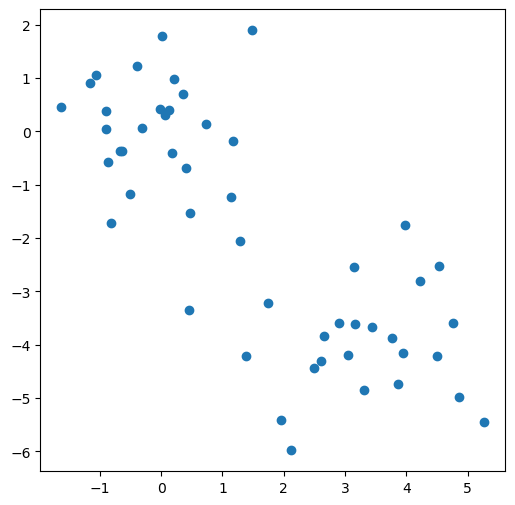

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(X[:,0], X[:,1])

### $K$-Means Clustering

The estimator `sklearn.cluster.KMeans()`  performs $K$-means clustering in
`Python`.  


We now perform $K$-means clustering with $K=2$.

We specify `random_state` to make the results reproducible.

We have used the `n_init` argument to run the $K$-means with 20 
initial cluster assignments (the default is 10). The `KMeans()` 
function will report only the best results. 

In [16]:
kmeans2 = KMeans(n_clusters=2,
                random_state=2,
                n_init=20).fit(X)

In [17]:
kmeans2.cluster_centers_

array([[ 3.25459846, -3.97195436],
       [-0.0873098 ,  0.01797684]])

`kmeans.labels_`: contains the cluster assignments of the 50 observations.

In [18]:
kmeans2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

The data is plotted with each observation colored according to its cluster assignment.

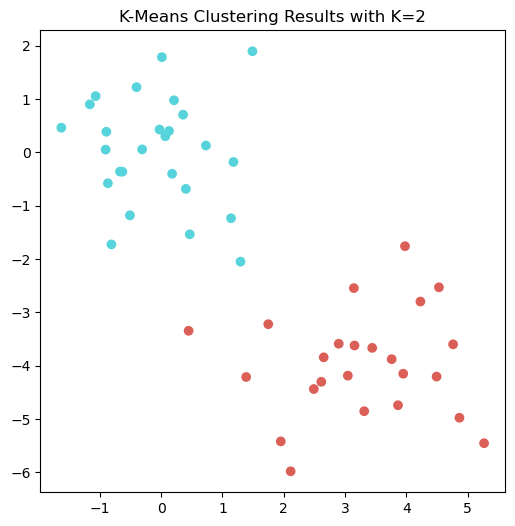

In [19]:
palette = sns.color_palette("hls", n_colors=kmeans2.n_clusters)
cluster_colors = [palette[label] for label in kmeans2.labels_]

fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(X[:,0], X[:,1], c=cluster_colors)
ax.set_title("K-Means Clustering Results with K=2");

`kmeans.inertia_`: the total within-cluster sum of squares, which we seek to minimize by performing $K$-means
clustering.

In [20]:
kmeans2.inertia_

99.31537074091582

In this example, we knew that there really were two clusters because we generated the data. 
However, for real data, we do not know the true number of clusters, nor whether they  exist in any precise way. We could instead have performed $K$-means clustering on this example with
$K=3$.

In [48]:
kmeans3 = KMeans(n_clusters=3,
                random_state=3,
                n_init=20).fit(X)


In [49]:
kmeans3.cluster_centers_

array([[ 2.05775969, -4.05384398],
       [-0.14255138,  0.1006649 ],
       [ 4.05490973, -3.77027467]])

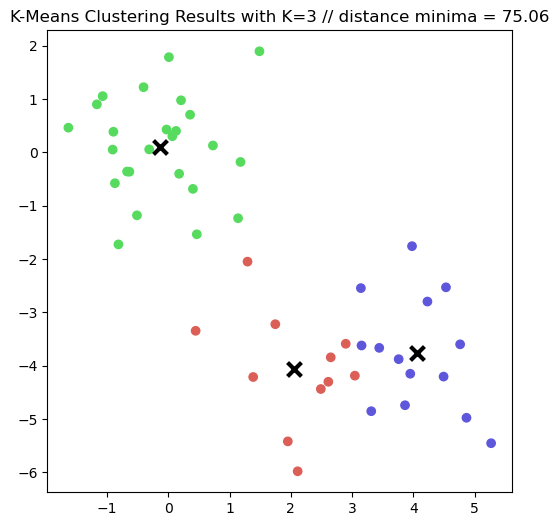

In [50]:
palette = sns.color_palette("hls", n_colors=kmeans3.n_clusters)
cluster_colors = [palette[label] for label in kmeans3.labels_]

fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(X[:,0], X[:,1], c=cluster_colors)
for i in range(kmeans3.n_clusters):
    ax.scatter(kmeans3.cluster_centers_[i,0],
               kmeans3.cluster_centers_[i,1],
               marker="x",
               s=100,
               c="black",
               lw=3)
ax.set_title("K-Means Clustering Results with K=3 // distance minima = {:.2f}".format(kmeans3.inertia_));


In [23]:
kmeans3.inertia_

75.06261242745384

### Analysis of the `n_init`

Here we compare using `n_init=1` to `n_init=20`.

In [54]:
kmeans1 = KMeans(n_clusters=3,
                random_state=3,
                n_init=1).fit(X)
kmeans20 = KMeans(n_clusters=3,
                  random_state=3,
                  n_init=20).fit(X);
kmeans1.inertia_, kmeans20.inertia_

(76.85131986999251, 75.06261242745384)

/tmp/ipykernel_62234/3657878573.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='x1', data=df, ax=axes[0], palette=palette)
/tmp/ipykernel_62234/3657878573.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='x2', data=df, ax=axes[1], palette=palette)


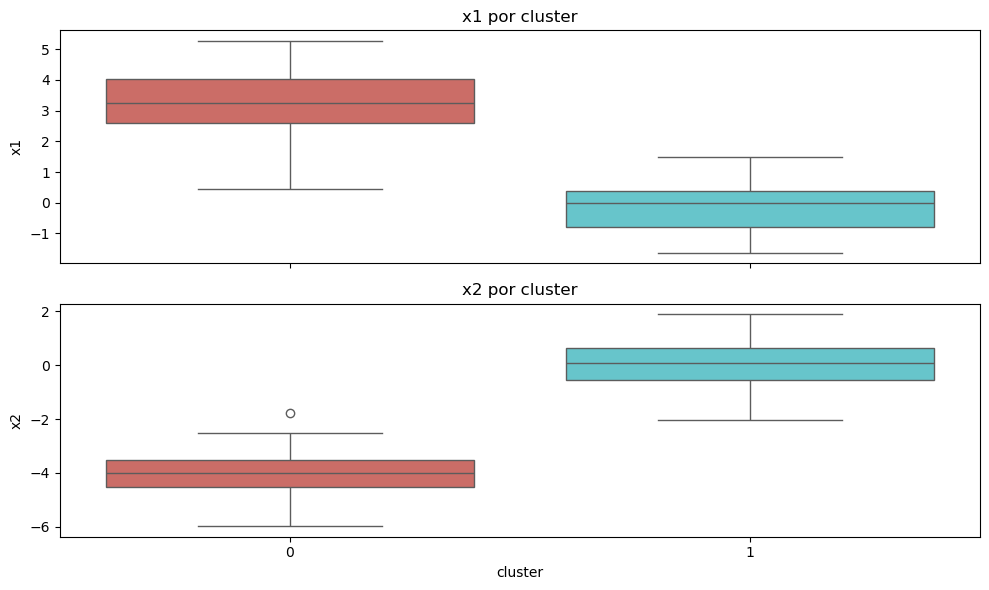

In [60]:
# ...existing code...
df = pd.DataFrame(X, columns=['x1','x2'])
labels = kmeans2.labels_
df['cluster'] = labels.astype(int)

fig, axes = plt.subplots(2, 1, figsize=(10,6), sharex=True)

n_clusters = len(np.unique(labels))
palette = sns.color_palette("hls", n_clusters)  # cambia paleta si quieres

sns.boxplot(x='cluster', y='x1', data=df, ax=axes[0], palette=palette)
axes[0].set_title('x1 por cluster')
axes[0].set_xlabel('')
axes[0].set_ylabel('x1')

sns.boxplot(x='cluster', y='x2', data=df, ax=axes[1], palette=palette)
axes[1].set_title('x2 por cluster')
axes[1].set_xlabel('cluster')
axes[1].set_ylabel('x2')

plt.tight_layout()
# ...existing code...
